In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
# Read CSV
mouse_data = pd.read_csv("Resources/mouse_drug_data.csv")
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [28]:
drug_data = pd.read_csv("Resources/clinicaltrial_data.csv")
drug_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [58]:
mouse_drug_df = pd.merge(mouse_data, drug_data, on='Mouse ID')
mouse_drug_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [59]:
# Tumor Response to Treatment

pv_df = pd.pivot_table(mouse_drug_df, index =['Drug','Timepoint'], values="Tumor Volume (mm3)")
pv_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [60]:
capm_df = mouse_drug_df.loc[(mouse_drug_df['Drug']=='Capomulin')&(mouse_drug_df['Timepoint']<=20)]

pd.pivot_table(capm_df, index =['Drug','Timepoint'], values="Tumor Volume (mm3)")

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [61]:
pd.pivot_table(mouse_drug_df, 'Tumor Volume (mm3)', 'Timepoint', 'Drug')

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


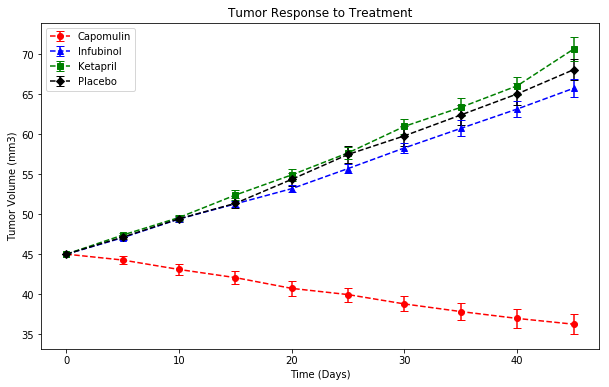

In [84]:
pv_plot = mouse_drug_df.groupby(['Drug','Timepoint'],as_index=True).agg({'Tumor Volume (mm3)':['mean','sem']})
pv_plot.columns = pv_plot.columns.get_level_values(1)
pv_plot = pv_plot.reset_index()

plt.figure(figsize=(10,6))
names = ['Capomulin','Infubinol','Ketapril','Placebo']
style_list = ['ro','b^','gs','kD']

i=0
for name in names:
    capm = pv_plot.loc[pv_plot['Drug']==name]

    plt.errorbar(capm['Timepoint'], capm['mean'],yerr=capm['sem'],label=name, fmt = style_list[i],linestyle = '--',capsize= 4)
    i= i+1
    plt.legend(loc="best")

    plt.title("Tumor Response to Treatment")
    plt.xlabel("Time (Days)")
    plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [76]:
# Metastatic Response to Treatment

metaresponse_df = mouse_drug_df.iloc[:,[1,2,4]]
metaresponse_df.head()

,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0
2,Stelasyn,10,0
3,Stelasyn,15,1
4,Stelasyn,20,2


In [10]:
meta_capm_df = metaresponse_df.loc[(metaresponse_df['Drug']=='Capomulin')&(metaresponse_df['Timepoint']<=20)]

pd.pivot_table(meta_capm_df, index =['Drug','Timepoint'], values="Metastatic Sites")

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
meta_pd = pd.pivot_table(metaresponse_df, 'Metastatic Sites', 'Timepoint', 'Drug')
meta_pd

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


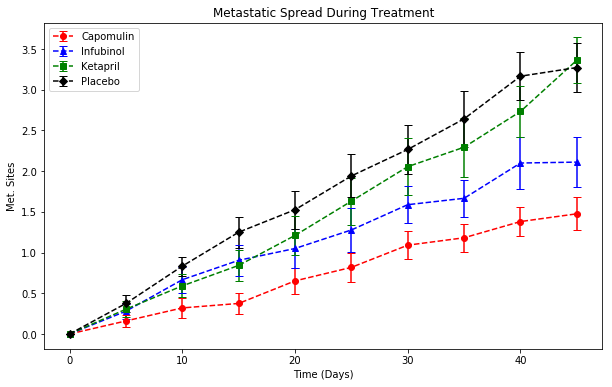

In [85]:
meta_pd1 = mouse_drug_df.groupby(['Drug','Timepoint'],as_index=True).agg({'Metastatic Sites':['mean','sem']})
meta_pd1.columns = meta_pd1.columns.get_level_values(1)
meta_pd1 = meta_pd1.reset_index()

#meta_pv_df = pd.pivot_table(metaresponse_df, index =['Drug','Timepoint'], values="Metastatic Sites")

#meta_pd1= meta_pv_df.reset_index()
#meta_pd1

plt.figure(figsize=(10,6))
#names = ['Capomulin','Infubinol','Ketapril','Placebo']
#style_list = ['ro','b^','gs','kD']
i = 0
for name in names:
    capm = meta_pd1.loc[meta_pd1['Drug']==name]
#    plt.plot(capm['Timepoint'], capm['Metastatic Sites'], style_list[i], label=name)
    plt.errorbar(capm['Timepoint'], capm['mean'],yerr=capm['sem'],label=name, fmt = style_list[i],linestyle = '--',capsize= 4)

    i = i+1
    plt.xlabel("Time (Days)")
    plt.ylabel("Met. Sites")
    plt.title("Metastatic Spread During Treatment")
    plt.legend(loc="best")
    
plt.show()


In [13]:
# Survival Rate

survival_df = mouse_drug_df.iloc[:,[0,1,2]]
survival_df.head()

,Mouse ID,Drug,Timepoint
0,f234,Stelasyn,0
1,f234,Stelasyn,5
2,f234,Stelasyn,10
3,f234,Stelasyn,15
4,f234,Stelasyn,20


In [14]:

survival_group_df = pd.pivot_table(mouse_drug_df, index =['Drug','Timepoint'], values='Mouse ID', aggfunc='count')
survival_group_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [15]:
capm_group_df1 =mouse_drug_df.loc[(mouse_drug_df['Drug']=='Capomulin') & (mouse_drug_df['Timepoint']<=20)]
capm_group_df1= capm_group_df1.rename(columns={'Mouse ID':'Mouse Count'})
pd.pivot_table(capm_group_df1, index =['Drug','Timepoint'], values="Mouse Count",aggfunc='count')

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [16]:
survival_df = survival_group_df.reset_index()
survival_df = survival_df.rename(columns={'Mouse ID':'Mouse Count'})
survival_df2 = pd.pivot_table(survival_df, 'Mouse Count', 'Timepoint', 'Drug')
survival_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [88]:
original_count_df = survival_df.loc[survival_df['Timepoint']==0]
original_count_df=original_count_df.iloc[:,[0,2]]      
original_count_df=original_count_df.rename(columns={'Mouse Count':'Original Mouse Count'})
survival_rate_df = pd.merge(survival_df, original_count_df, on='Drug')
survival_rate_df['Survival Rate']= survival_rate_df['Mouse Count']/survival_rate_df['Original Mouse Count']
survival_rate_df['sem']= np.sqrt(survival_rate_df['Survival Rate']*(1-survival_rate_df['Survival Rate'])/survival_rate_df['Original Mouse Count'])
survival_rate_df.head()

,Drug,Timepoint,Mouse Count,Original Mouse Count,Survival Rate,sem
0,Capomulin,0,25,25,1.00,0.000000
1,Capomulin,5,25,25,1.00,0.000000
2,Capomulin,10,25,25,1.00,0.000000
3,Capomulin,15,24,25,0.96,0.039192
4,Capomulin,20,23,25,0.92,0.054259


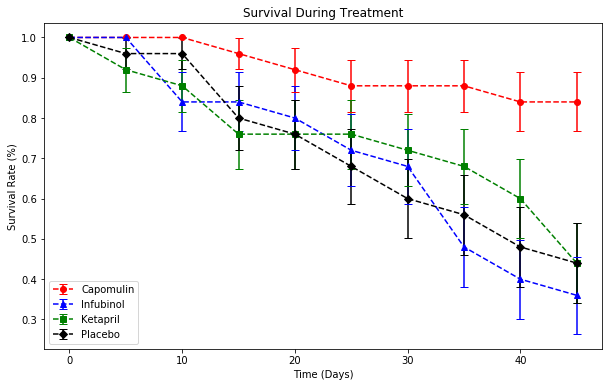

In [89]:
#names = ['Capomulin','Infubinol','Ketapril','Placebo']
#style_list = ['ro--','b^--','gs--','kD--']

i = 0
plt.figure(figsize=(10,6))
for name in names:
    capm =survival_rate_df.loc[survival_rate_df['Drug']==name]
#    plt.plot(capm['Timepoint'], capm['Survival Rate'], style_list[i], label=name)
    plt.errorbar(capm['Timepoint'], capm['Survival Rate'],yerr=capm['sem'],label=name, fmt = style_list[i],linestyle = '--',capsize= 4)

    i = i+1
    plt.grid()
    plt.title("Survival During Treatment")
    plt.xlabel("Time (Days)")
    plt.ylabel("Survival Rate (%)")
    plt.legend(loc="best")
plt.show()


In [19]:
# Summary Bar Graph
volume_drug_df1= mouse_drug_df.loc[mouse_drug_df['Timepoint']==0]
volume_drug_df1= volume_drug_df1.rename(columns={'Tumor Volume (mm3)':'Volume 0'})

volume_drug_df2= mouse_drug_df.loc[mouse_drug_df['Timepoint']==45]
volume_drug_df2= volume_drug_df2.rename(columns={'Tumor Volume (mm3)':'Volume 45'})

volume_drug = pd.merge(volume_drug_df1, volume_drug_df2, on = 'Mouse ID')
volume_drug = volume_drug.iloc[:,[0,1,3,7]]
volume_drug = volume_drug.rename(columns={'Drug_x':'Drug'})
volume_drug['volume change']= (volume_drug['Volume 45']-volume_drug['Volume 0'])/volume_drug['Volume 0']*100
volume_drug= volume_drug.iloc[:,[1,4]]
volume_change_rate_df = volume_drug.groupby('Drug')
volume_change =volume_change_rate_df.describe()
volume_change1 = pd.DataFrame(volume_change['volume change']['mean'])
volume_change1 = volume_change1.reset_index()
volume_change1 = volume_change1.rename(columns={'mean':'Volume Change %'})
print(volume_change1)
                                                                                        
                                                                                                                                                                        

        Drug  Volume Change %
0  Capomulin       -19.475303
1   Ceftamin        42.516492
2  Infubinol        46.123472
3   Ketapril        57.028795
4   Naftisol        53.923347
5    Placebo        51.297960
6   Propriva        47.241175
7   Ramicane       -22.320900
8   Stelasyn        52.085134
9  Zoniferol        46.579751


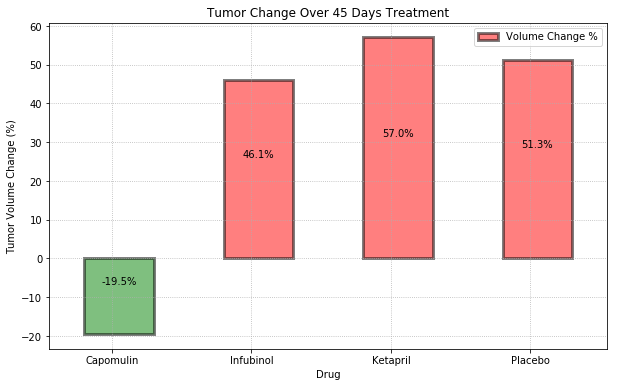

In [20]:
names = ['Capomulin','Infubinol','Ketapril','Placebo']

tumor_rate_final = volume_change1.loc[(volume_change1['Drug']=='Capomulin')| (volume_change1['Drug']=='Infubinol')|(volume_change1['Drug']=='Ketapril') |(volume_change1['Drug']=='Placebo')]
  
ax =tumor_rate_final.plot(x='Drug', y='Volume Change %', kind='bar',alpha=0.5, linewidth =3, align="edge", facecolor = 'red',edgecolor = 'black',figsize=(10,6))

#for i in range(0,len(names)):
#    if tumor_rate_final['Volume Change %'].iloc[i]<0:
  #      ax.patches[i].set_color('green')

i=0
for v in tumor_rate_final['Volume Change %']:
    if v<0:
           ax.patches[i].set_facecolor('green')
    i=i+1
    
x_axis = np.arange(len(names))
tick_locations = [value+0.2 for value in x_axis]

plt.xticks(tick_locations, names,rotation=0 )
plt.grid(linestyle='dotted')
plt.title("Tumor Change Over 45 Days Treatment")

plt.ylabel("Tumor Volume Change (%)")
labels = [ "{:.1f}".format(i)+"%" for i in tumor_rate_final['Volume Change %']]
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, (height + 5)/2, label, ha='center', va='bottom')
plt.show()

In [21]:
volume_change

volume change                                              \
                  count       mean        std        min        25%   
Drug                                                                  
Capomulin          21.0 -19.475303  12.464376 -48.125338 -28.050318   
Ceftamin           13.0  42.516492   7.229993  32.759779  36.519761   
Infubinol           9.0  46.123472   7.629516  35.375037  39.454336   
Ketapril           11.0  57.028795  10.710387  39.798757  49.175924   
Naftisol           13.0  53.923347  11.348379  39.268353  42.103645   
Placebo            11.0  51.297960   9.962592  30.299937  46.568489   
Propriva            7.0  47.241175  11.103840  30.296454  41.225308   
Ramicane           20.0 -22.320900  12.192086 -50.999719 -31.152944   
Stelasyn           11.0  52.085134  11.619655  33.604468  42.341004   
Zoniferol          14.0  46.579751   8.344526  35.006009  39.151442   

                                            
                 50%        75%        max  
Drug                                        
Capomulin -17.084787 -10.757288   5.968807  
Ceftamin   42.888511  50.061072  53.162632  
Infubinol  46.851258  50.412375  60.503846  
Ketapril   55.271668  64.450539  74.593364  
Naftisol   54.585824  64.150766  70.375150  
Placebo    53.428535  58.859537  62.695419  
Propriva   44.350137  56.289485  61.012047  
Ramicane  -22.558606 -14.425988   0.490820  
Stelasyn   53.998109  61.271337  66.941532  
Zoniferol  45.965975  51.870585  62.943183

In [90]:
pv_2 = mouse_drug_df.groupby(['Drug','Timepoint'],as_index=True).agg({'Tumor Volume (mm3)':['mean','sem']})
pv_2.columns = pv_2.columns.get_level_values(1)
pv_2.reset_index().head()

,Drug,Timepoint,mean,sem
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [67]:
pv_plot = mouse_drug_df.groupby(['Drug','Timepoint'],as_index=True).agg({'Tumor Volume (mm3)':['mean','sem']})
pv_plot.columns = pv_plot.columns.get_level_values(1)
pv_plot = pv_plot.reset_index()

In [69]:
capm = pv_plot.loc[pv_plot['Drug']=='Capomulin']
capm

,Drug,Timepoint,mean,sem
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731
5,Capomulin,25,39.939528,0.881642
6,Capomulin,30,38.769339,0.934460
7,Capomulin,35,37.816839,1.052241
8,Capomulin,40,36.958001,1.223608
9,Capomulin,45,36.236114,1.223977
